In [1]:
import numpy as np
from fortuns_algorithm import FortuneAlgorithm
from metrix import l2
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook 

# Demonstration

<IPython.core.display.Javascript object>


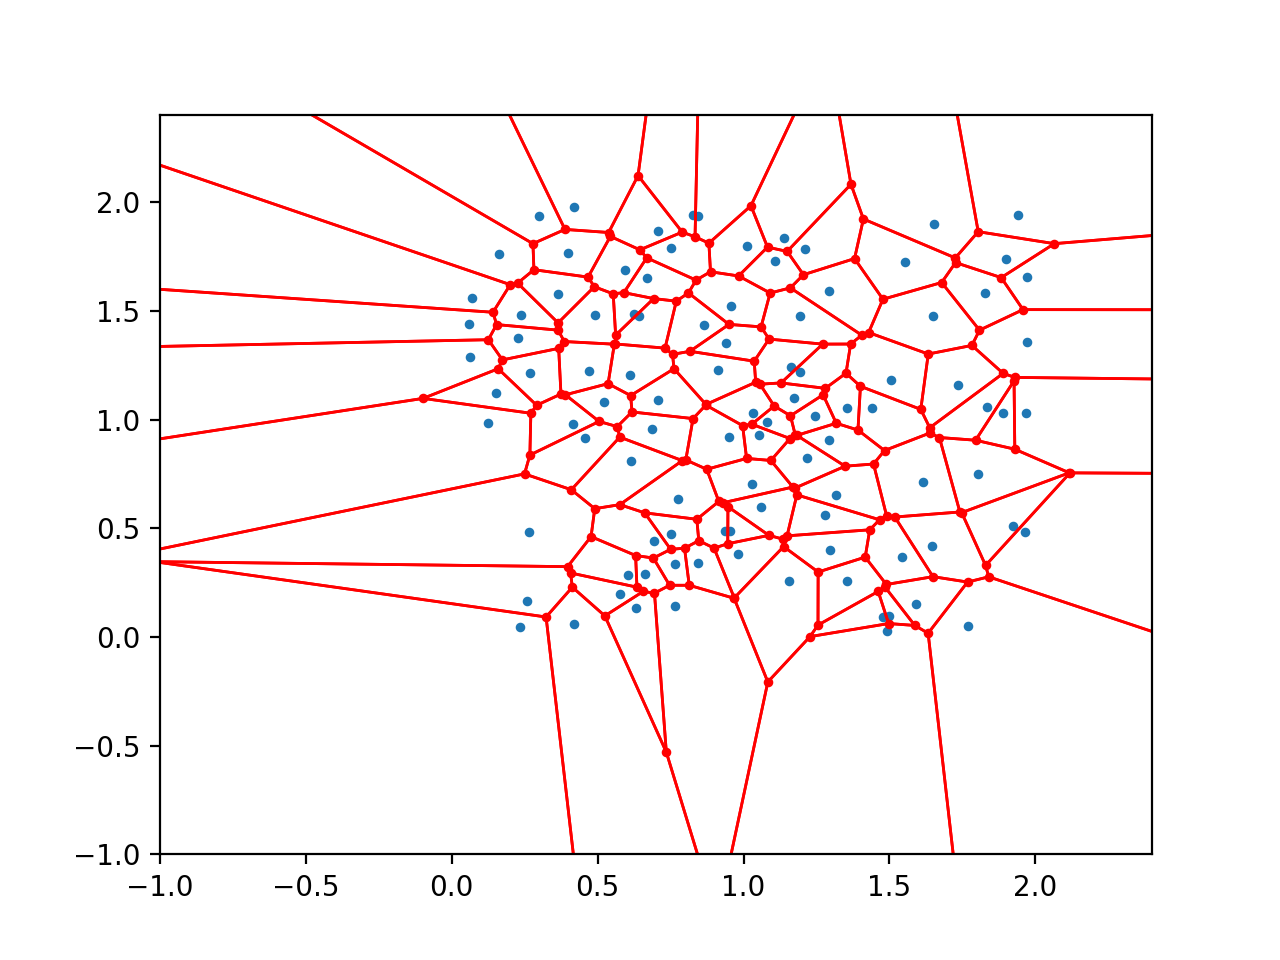

In [3]:
plt.close()

a, b = 0, 2

points = np.array([np.random.uniform(a, b, size=(2,)) for _ in range(100)])

plt.xlim((a-1, b + 0.4))
plt.ylim((a-1, b + 0.4))

plt.scatter(*zip(*points), s=6)

fortuna = FortuneAlgorithm(points, metric=l2)
fortuna.construct()
fortuna.bound(a-1.5, a-1.5, b + 1.5, b + 1.5)

diagram = fortuna.diagram

for p in diagram.vertices:
    plt.scatter(*p.point, color='red', s=6)

for e in diagram.half_edges:
    if e.origin is not None and e.destination is not None:
        plt.plot(*zip(*[e.origin.point, e.destination.point]), color='red', linewidth=1)

plt.show()

# Runtime analisis 

In [4]:
def run(n, a, b):
    import time

    points = np.array([np.random.uniform(a, b, size=(2,)) for _ in range(n)])

    fortuna = FortuneAlgorithm(points, metric=l2)

    start = time.time()
    fortuna.construct()

    fortuna.bound(a-1.5, a-1.5, b + 1.5, b + 1.5)
    end = time.time()

    diagram = fortuna.diagram

    return diagram, points, end - start

<IPython.core.display.Javascript object>


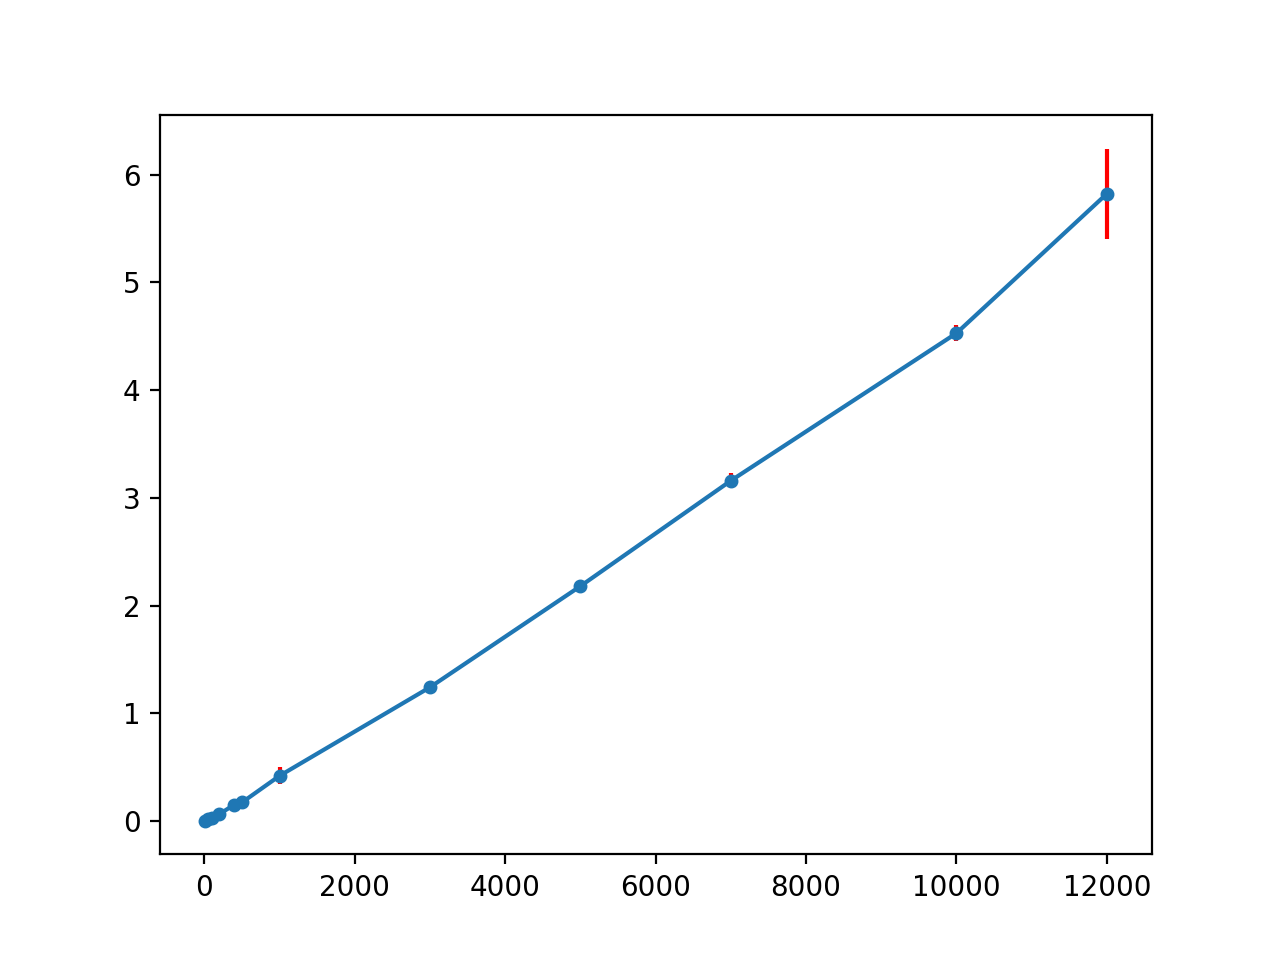

In [5]:
plt.close()

times = [[], []]

ns = [10, 50, 100, 200, 400, 500, 1000, 3000, 5000, 7000, 10000, 12000]
#ns = [10, 50, 100]

for i in ns:
    diagram, points, time1 = run(i, 0, 30)
    diagram, points, time2 = run(i, 0, 30)
    diagram, points, time3 = run(i, 0, 30)
    
    time = np.mean([time1, time2, time3])
    std = np.std([time1, time2, time3])
    
    times[0].append(time)
    times[1].append(std)

plt.errorbar(ns, times[0], yerr=times[1], marker='o', ms=4, ecolor='red')
plt.show()